In [1]:
%config Completer.use_jedi=False

In [2]:
import json
import os
import shutil

## You just need to add video_ids.json for this script

In [3]:
# load video ids
with open("video_ids.json", "r") as jf:
    video_ids = json.load(jf)

In [4]:
ids = [idx for plist in list(video_ids.values()) for idx in plist]

In [5]:
video_folder = os.listdir("output/")
video_folder.remove('.DS_Store')

In [6]:
len(video_folder)

102

In [7]:
from PIL import Image

In [8]:
image = Image.open("output/" + str(video_folder[0]) +"/"+ str(video_folder[0]) + ".png")

In [9]:
import matplotlib.pyplot as plt

%matplotlib inline

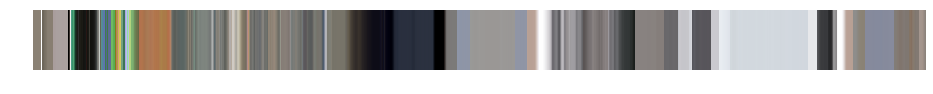

In [10]:
plt.rcParams["figure.figsize"] = (16, 36)
plt.imshow(image)
plt.axis('off')
plt.show()

### Ideas
 - How about we just get the smallest size of width of the image? Such as we have 250x100, 250x3400, 250x5670. We just get 250x100 of all images and apply Kmeans/DBSCAN all of these images?
 - How about we summaries the video and and get the length of all movie barcodes to same, then apply Kmeans/DBSCAN?
 - How about finding color palette of the image with kmeans and after that apply another kmeans for image clustering?

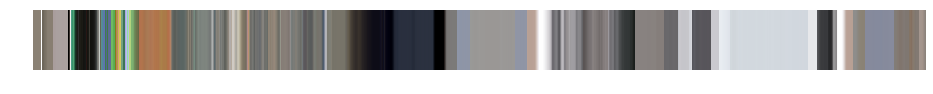

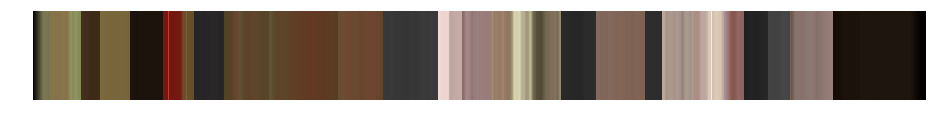

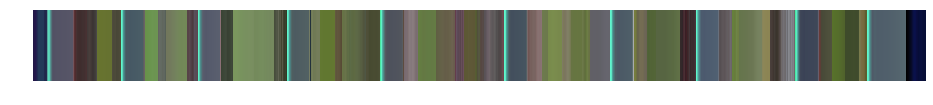

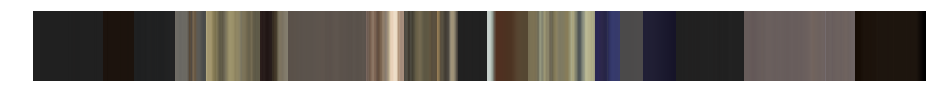

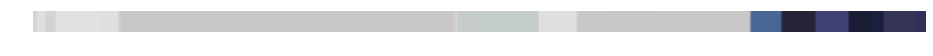

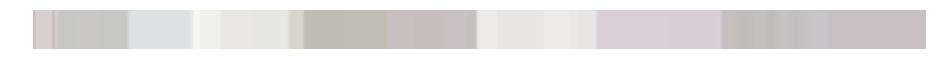

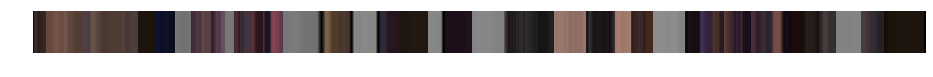

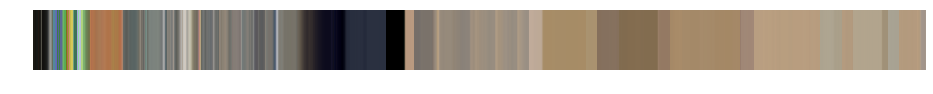

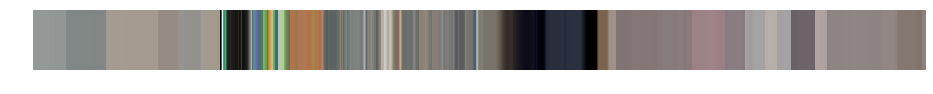

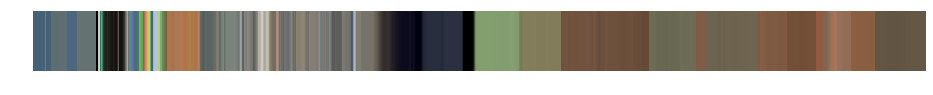

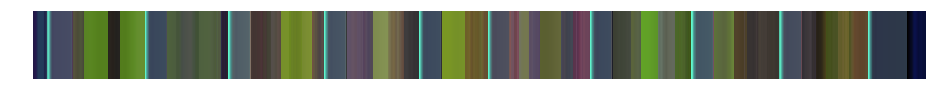

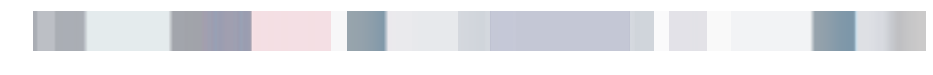

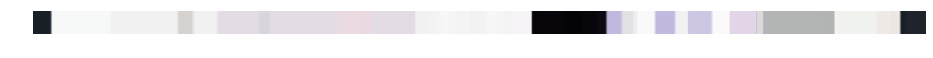

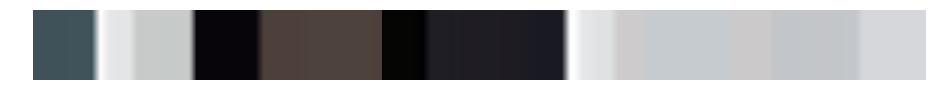

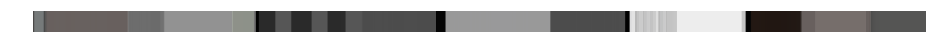

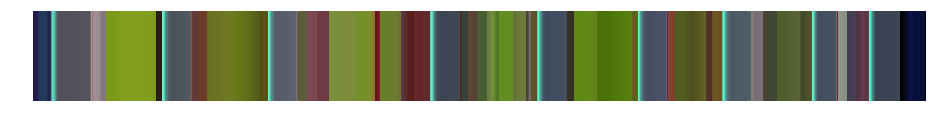

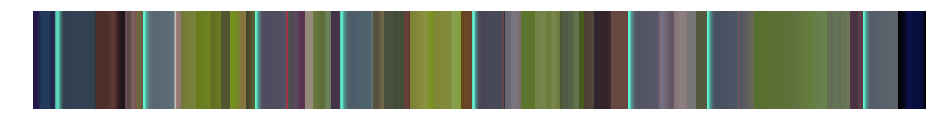

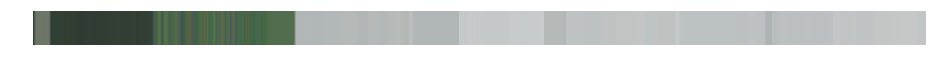

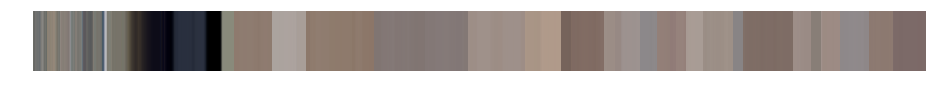

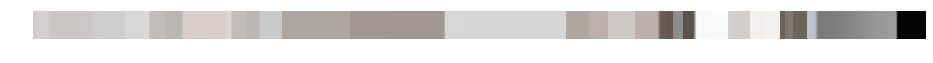

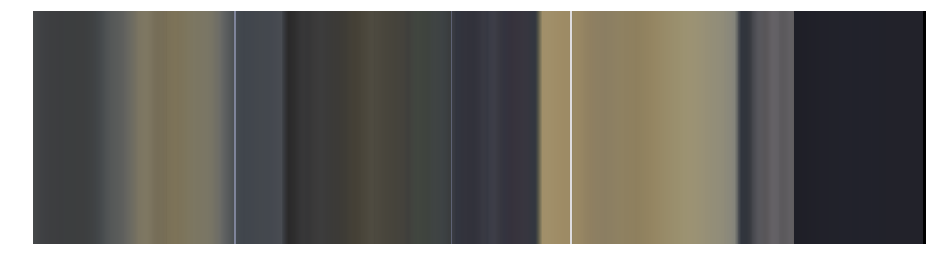

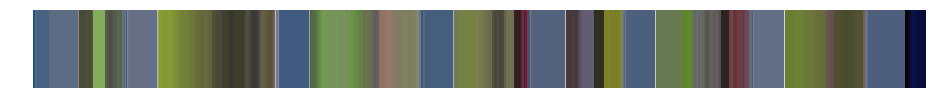

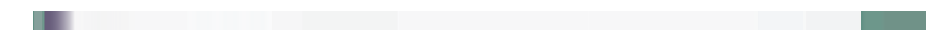

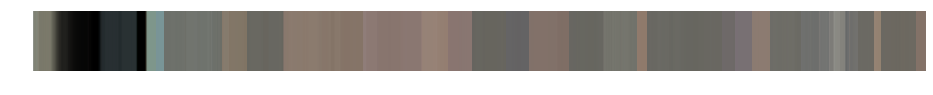

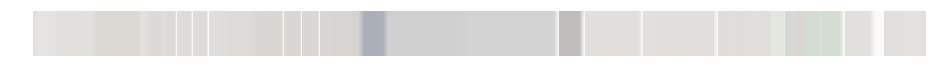

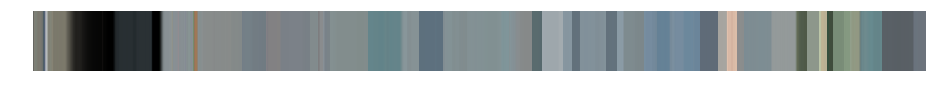

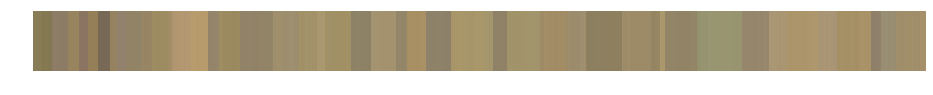

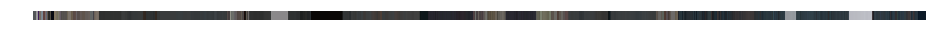

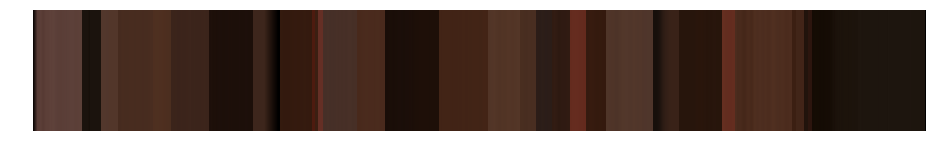

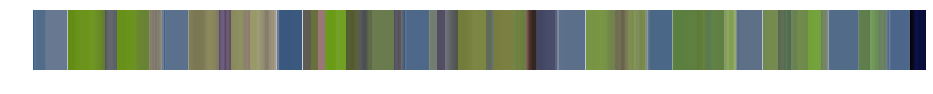

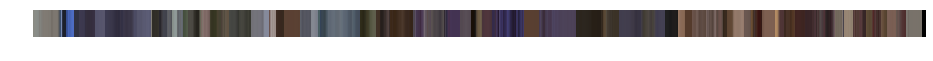

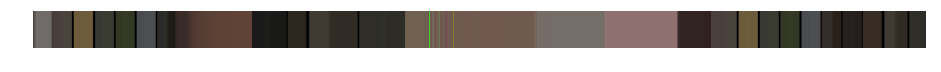

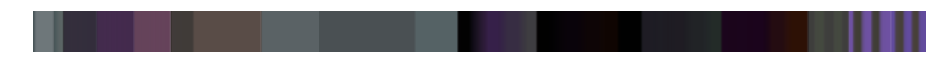

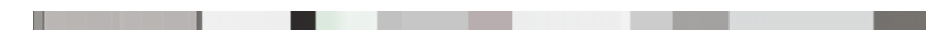

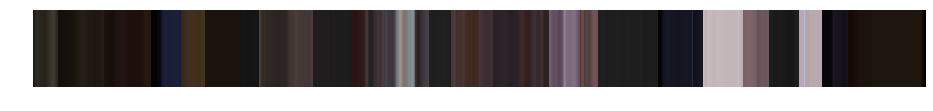

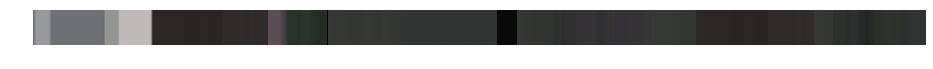

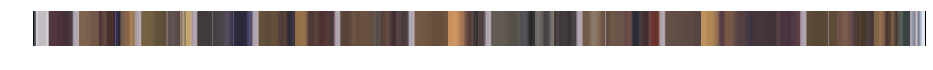

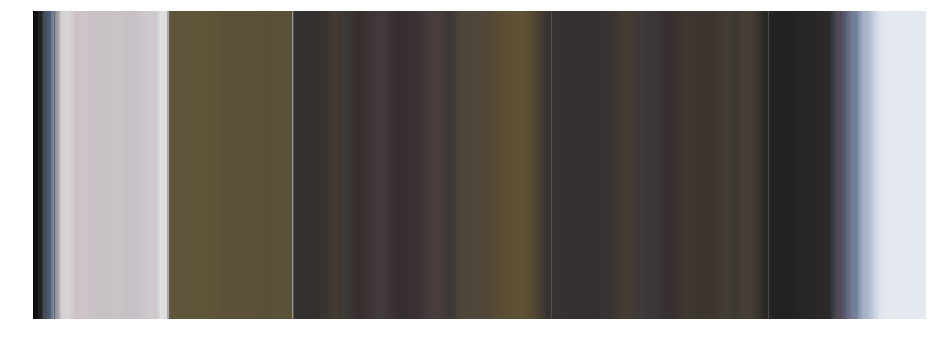

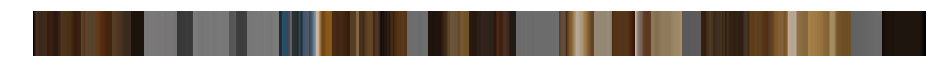

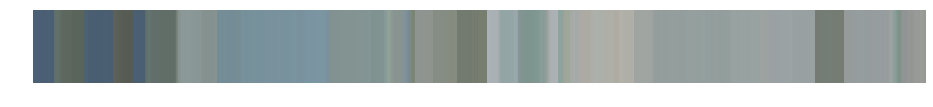

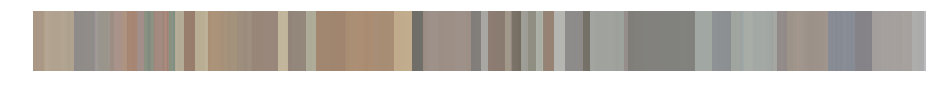

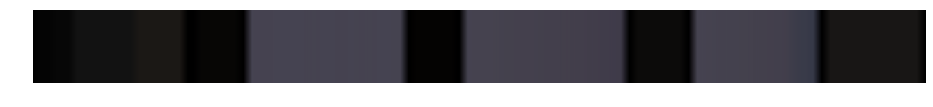

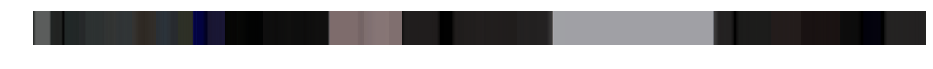

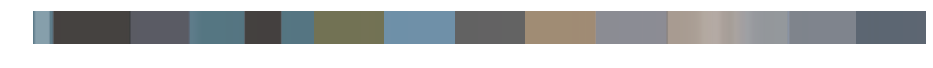

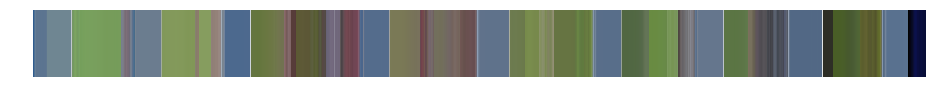

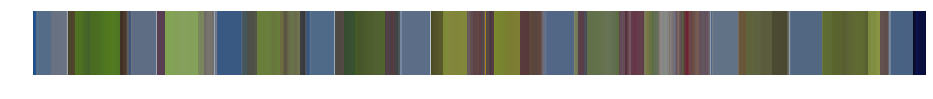

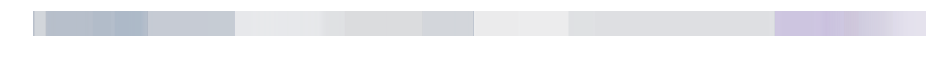

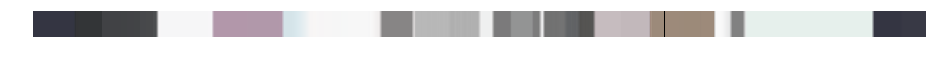

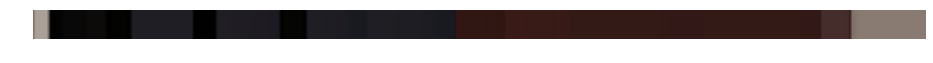

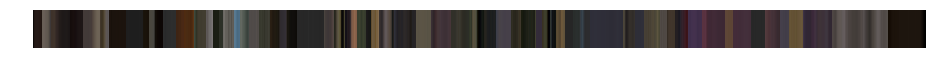

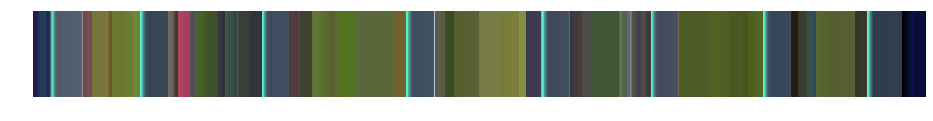

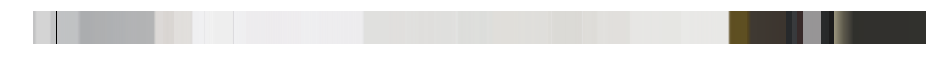

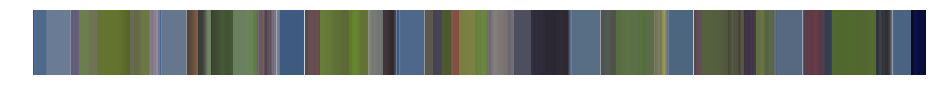

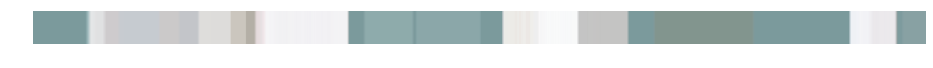

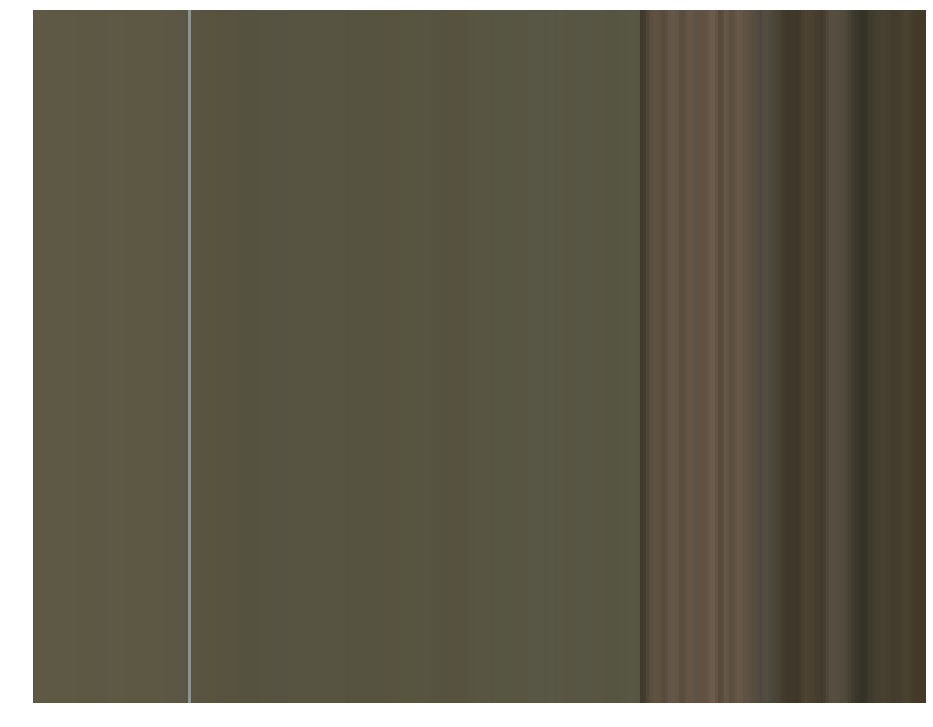

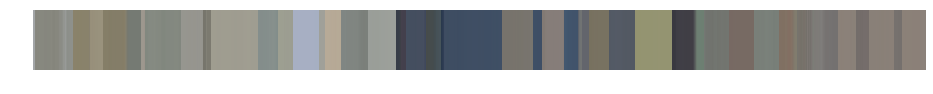

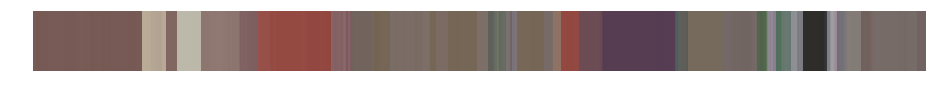

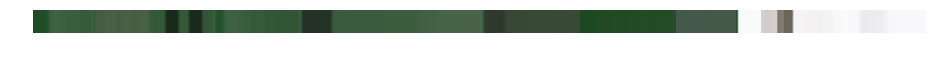

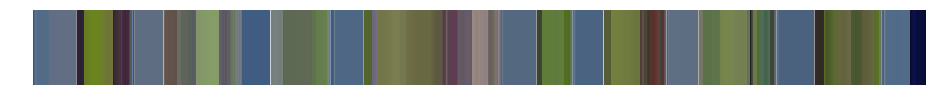

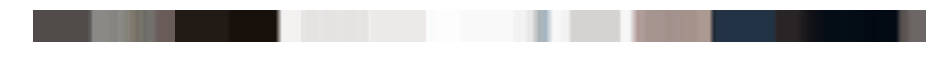

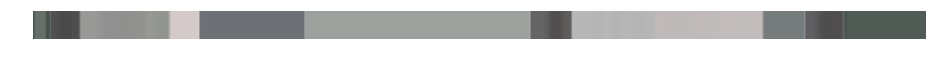

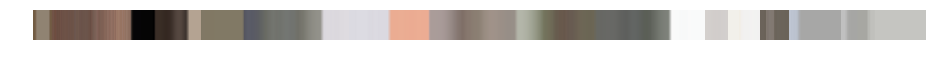

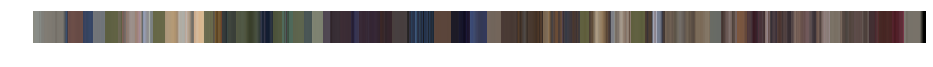

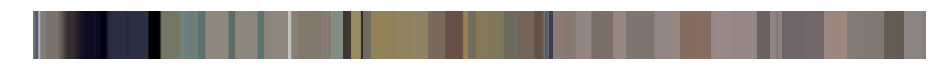

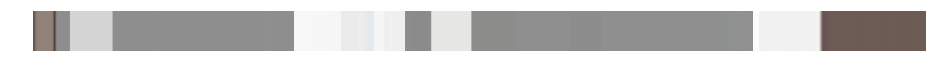

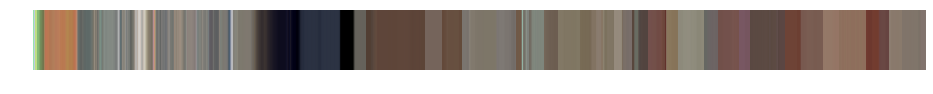

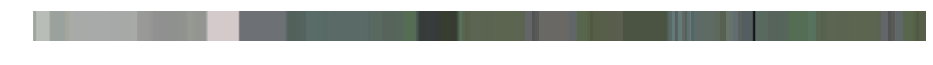

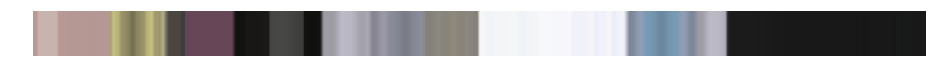

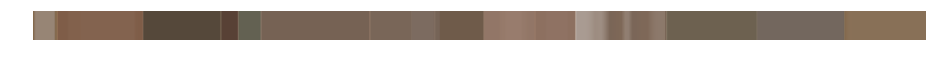

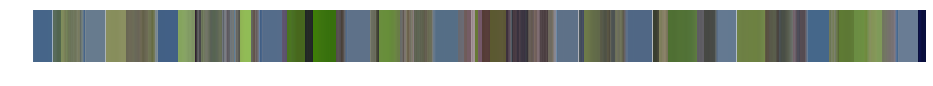

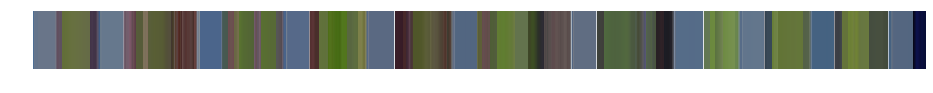

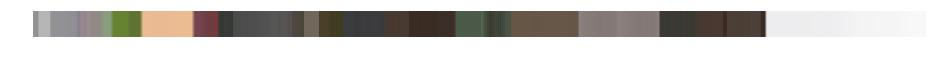

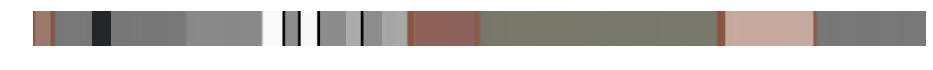

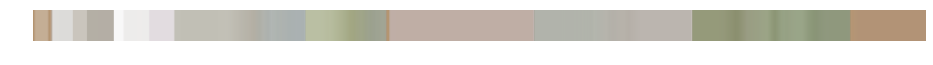

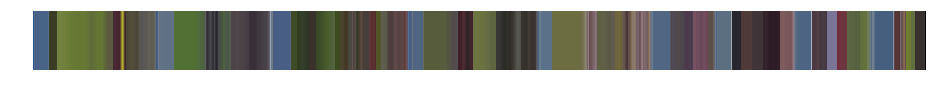

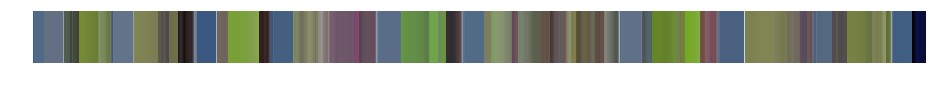

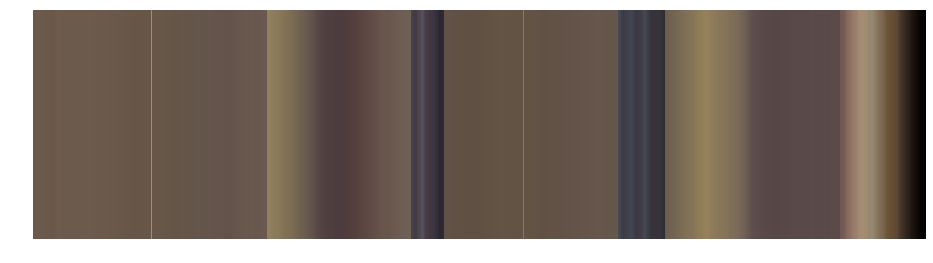

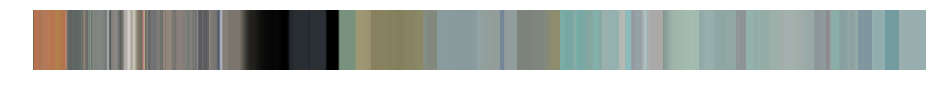

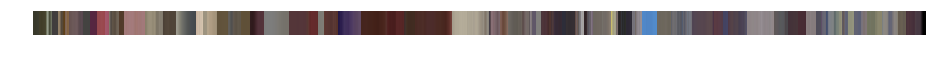

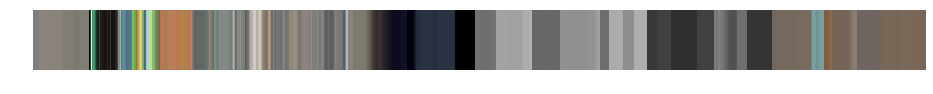

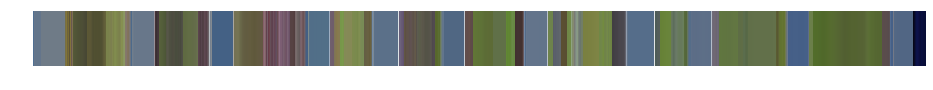

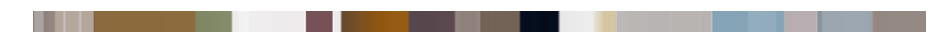

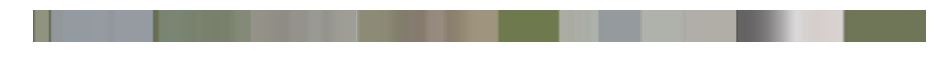

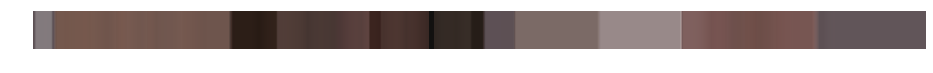

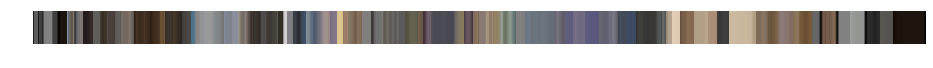

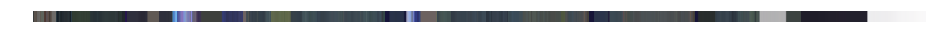

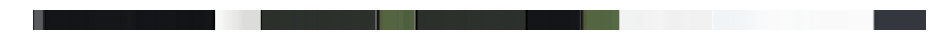

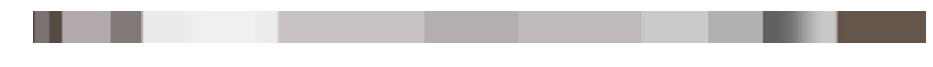

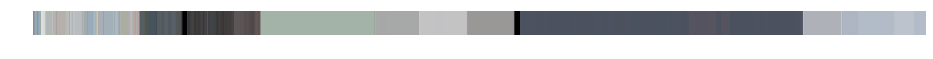

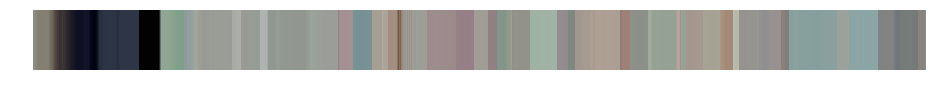

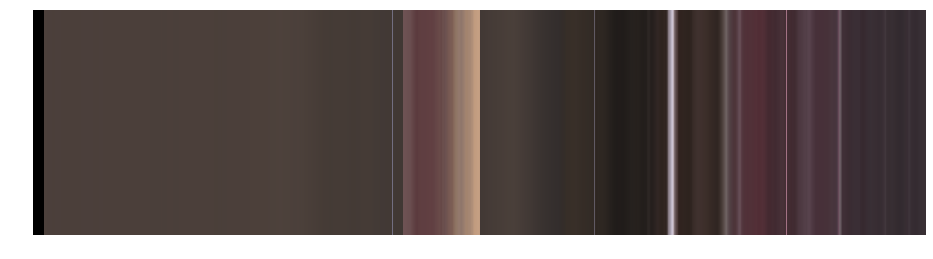

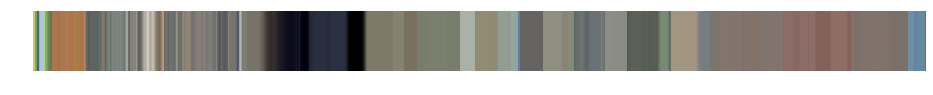

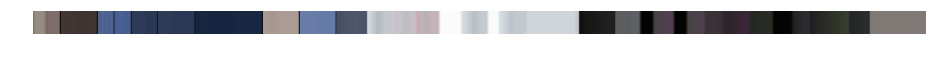

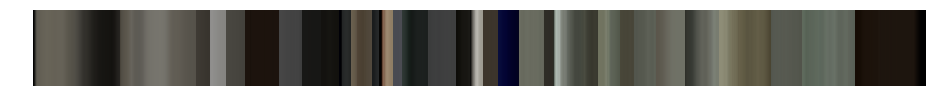

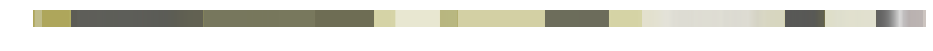

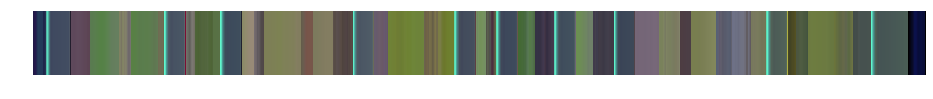

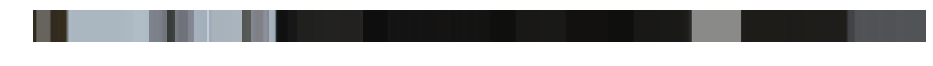

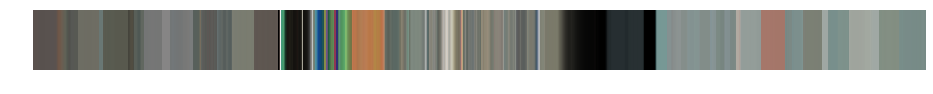

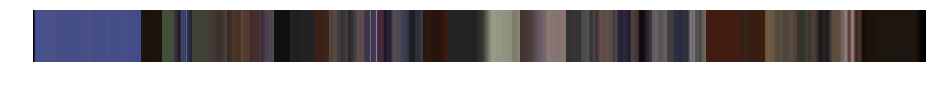

In [11]:
for video_id in video_folder:
    if os.path.exists("output/" + str(video_id) +"/"+ str(video_id) + ".png"):
        shutil.copyfile("output/" + str(video_id) +"/"+ str(video_id) + ".png", "pics/" + str(video_id) + ".png")
        image = Image.open("output/" + str(video_id) +"/"+ str(video_id) + ".png")
        plt.imshow(image)
        plt.axis('off')
        plt.show()

pics/cPcHgjIRCGk.png
pics/8ypnLjwpzK8.png
pics/eSaShQbUJTQ.png
pics/e_9f5Z0sMYE.png
pics/aJq6ygTWdao.png
pics/tfb6aEUMC04.png
pics/kie4wjB1MCw.png
pics/9bcbh2hC7Hw.png
pics/HBrGsZWgyng.png
pics/PjaIWUrn5Gg.png
pics/tocT69svWII.png
pics/Bui3DWs02h4.png
pics/xp-YOPcjkFw.png
pics/P0fMwA3X5KI.png
pics/x-ypDmQ1V_8.png
pics/rAbhypxs1qQ.png
pics/44LOY6Z1jGU.png
pics/32BNKOU3uNw.png
pics/thQ7QjqNPlY.png
pics/ba8fiWZTmK4.png
pics/WovbLx8C0yA.png
pics/u7kQ5lNfUfg.png
pics/pFR9JS9uSs0.png
pics/TV3BdT0sngA.png
pics/JJlSgm9OByM.png
pics/oT37S3aLVKQ.png
pics/9xlSy9F5WtE.png
pics/47RDmQxZDQA.png
pics/q4-hUP7iNjk.png
pics/SsuUpXfOObM.png
pics/yE7uJOud8XE.png
pics/Fevg4aowNyc.png
pics/HvH0b9K_Iro.png
pics/-ryF7237gNo.png
pics/xlrGOfvYcQc.png
pics/A0wQLkouP-0.png
pics/MVbKaPiS14Q.png
pics/40EmeDM0tyQ.png
pics/_tiUtvCl-ic.png
pics/ZrJIe_V7pYU.png
pics/5rME8vgW42o.png
pics/V1eYniJ0Rnk.png
pics/u90TbxK7VEA.png
pics/XeGwvSytluA.png
pics/3w2yLLH31Cs.png
pics/g-HJLOtLkns.png
pics/PTr9aKsxZ3I.png
pics/bcZFQ3f2

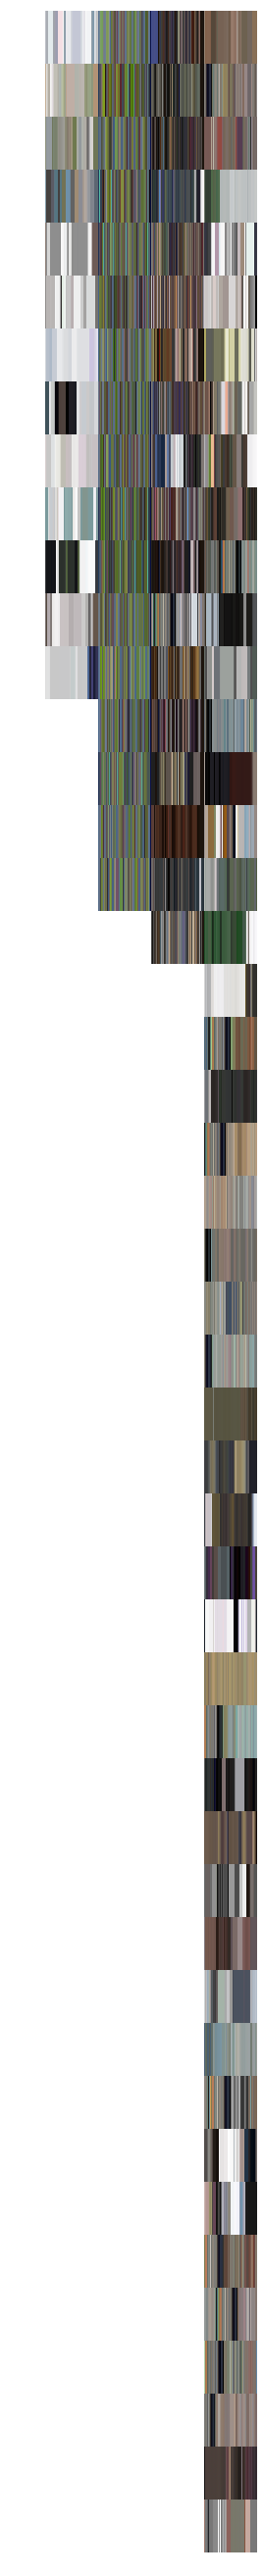

In [67]:
from imagecluster import calc, io as icio, postproc


##images,fingerprints,timestamps = icio.get_image_data(
##    'pics/',
##    pca_kwds=dict(n_components=0.95),
##    img_kwds=dict(size=(224,224)))

# Create image database in memory. This helps to feed images to the NN model
# quickly.
images = icio.read_images('pics/', size=(224,224))

# Create Keras NN model.
model = calc.get_model()

# Feed images through the model and extract fingerprints (feature vectors).
fingerprints = calc.fingerprints(images, model)

# Optionally run a PCA on the fingerprints to compress the dimensions. Use a
# cumulative explained variance ratio of 0.95.
fingerprints = calc.pca(fingerprints, n_components=0.95)

# Read image timestamps. Need that to calculate the time distance, can be used
# in clustering.
timestamps = icio.read_timestamps('pics/')

# Run clustering on the fingerprints. Select clusters with similarity index
# sim=0.5. Mix 80% content distance with 20% timestamp distance (alpha=0.2).
clusters = calc.cluster(fingerprints, sim=0.4, timestamps=timestamps, alpha=0.1)

# Create dirs with links to images. Dirs represent the clusters the images
# belong to.
postproc.make_links(clusters, 'pics/imagecluster/clusters')

# Plot images arranged in clusters and save plot.
fig,ax = postproc.plot_clusters(clusters, images)
fig.savefig('foo.png')
postproc.plt.show()



**************17**************


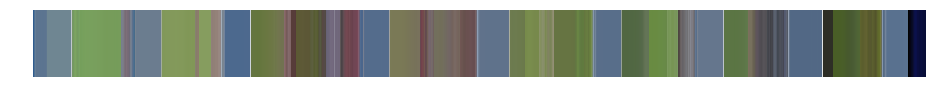

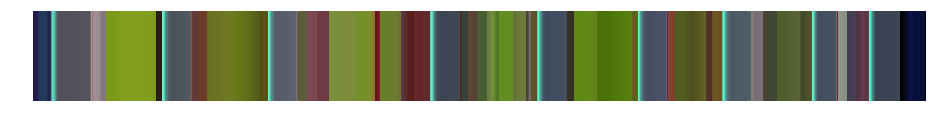

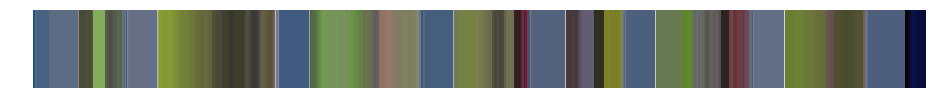

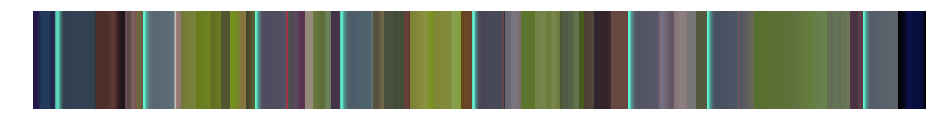

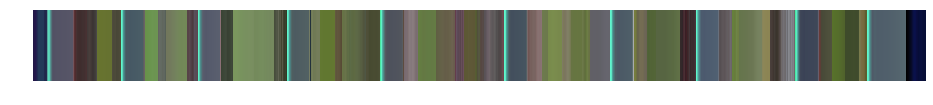

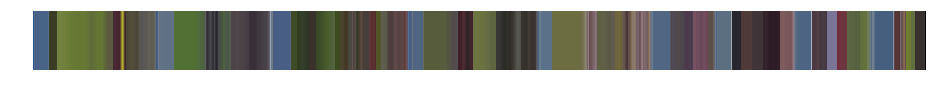

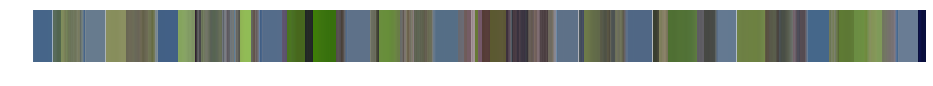

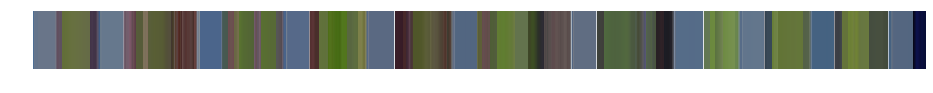

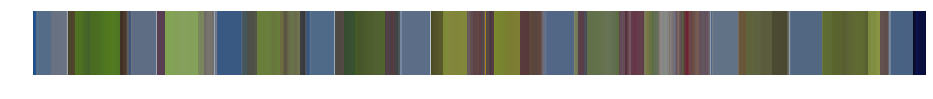

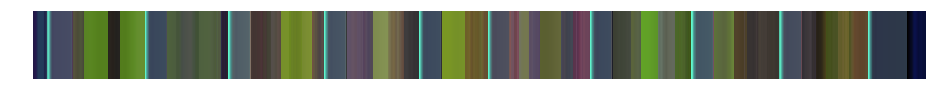

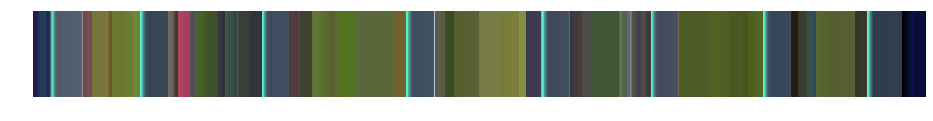

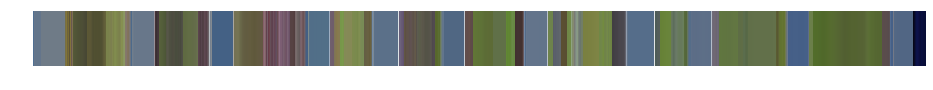

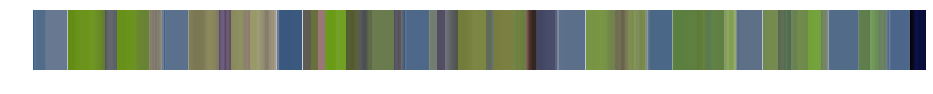

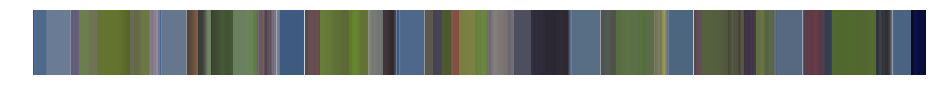

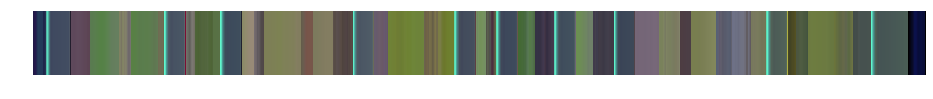

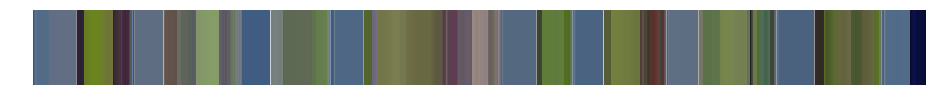

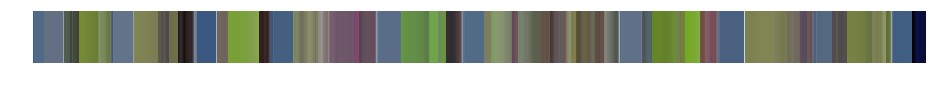

**************18**************


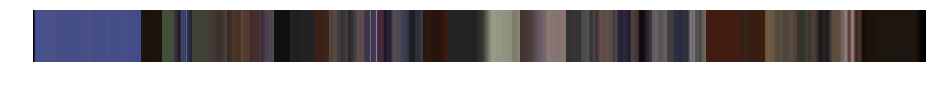

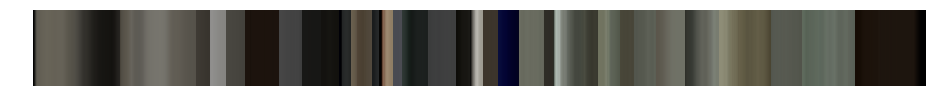

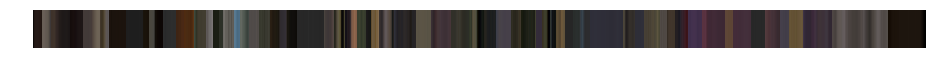

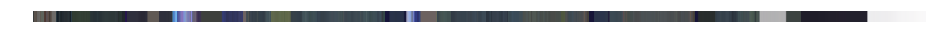

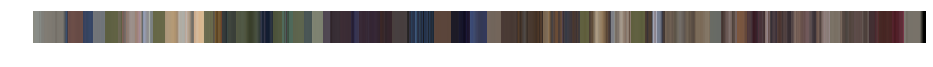

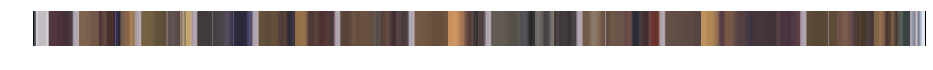

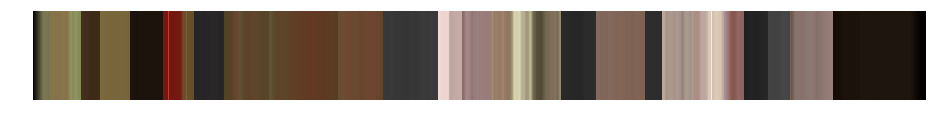

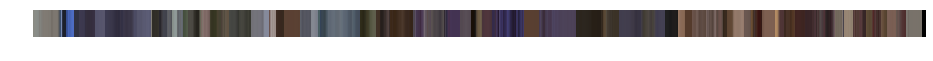

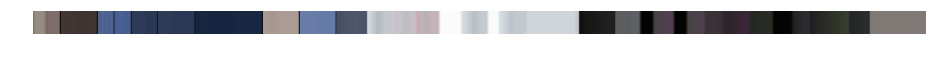

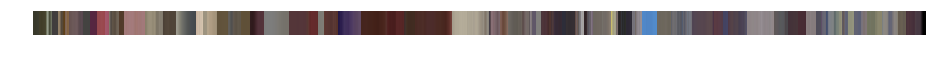

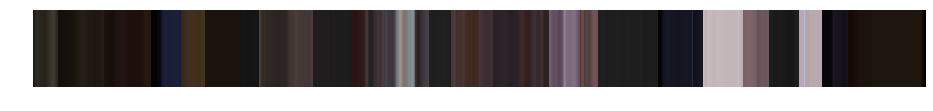

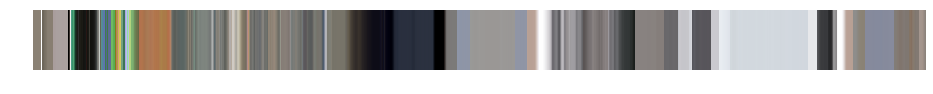

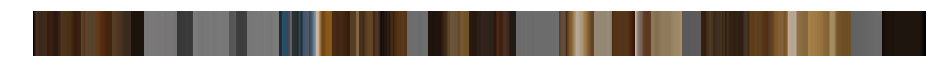

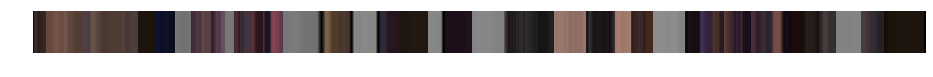

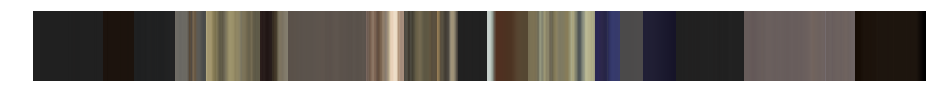

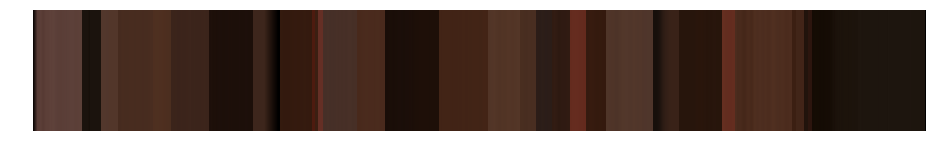

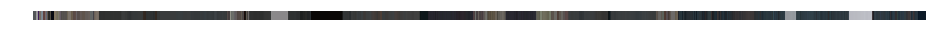

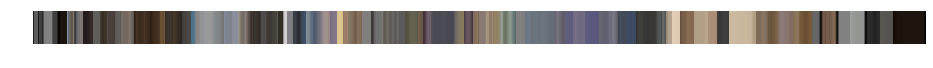

**************48**************


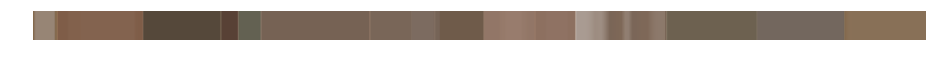

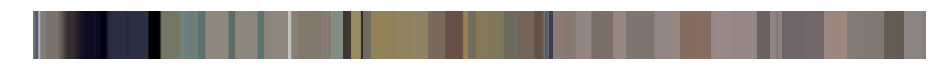

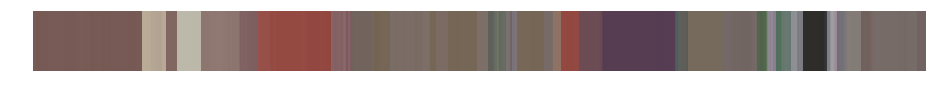

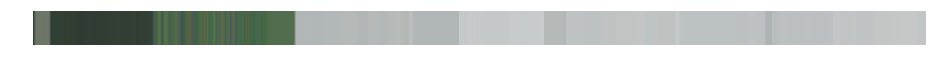

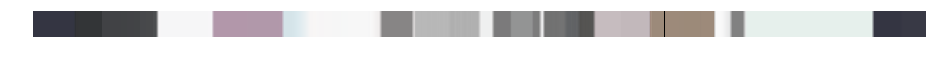

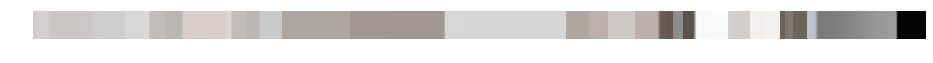

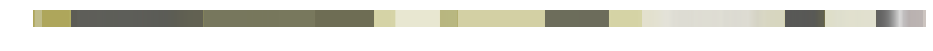

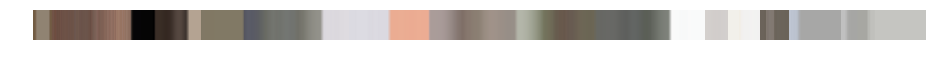

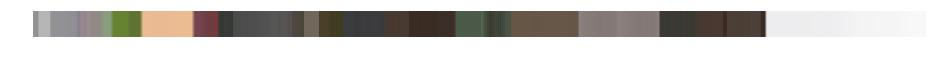

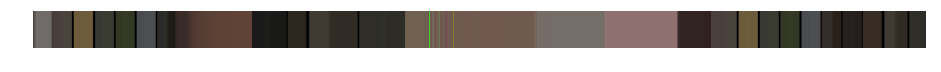

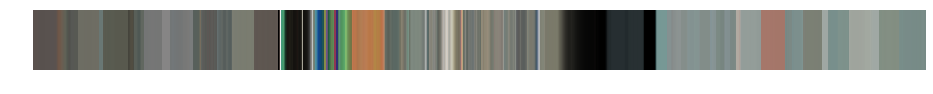

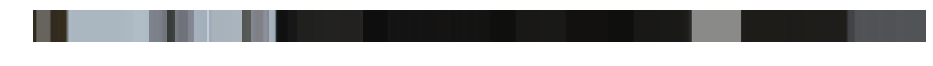

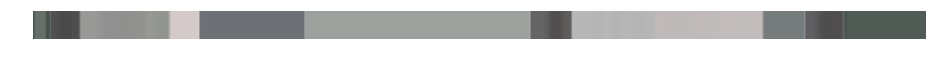

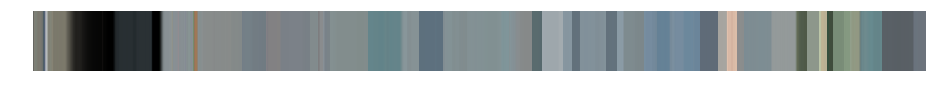

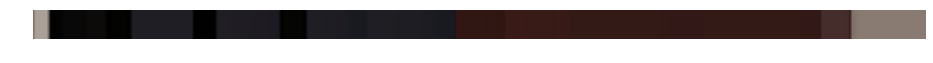

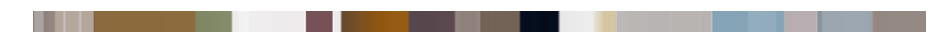

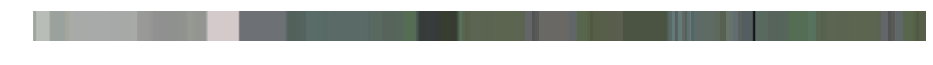

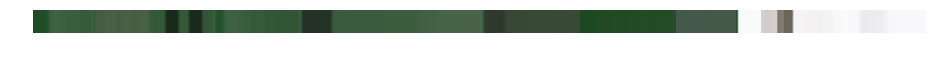

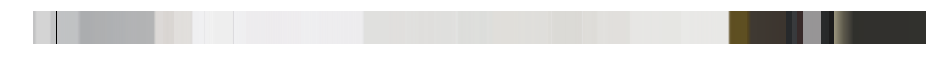

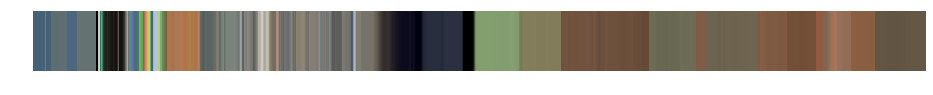

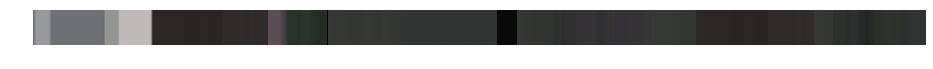

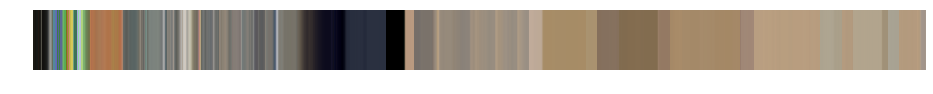

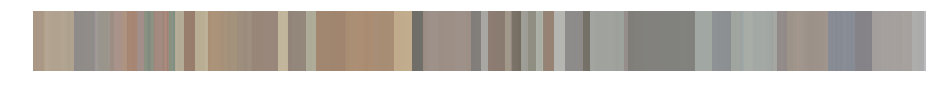

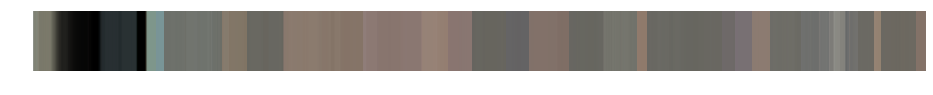

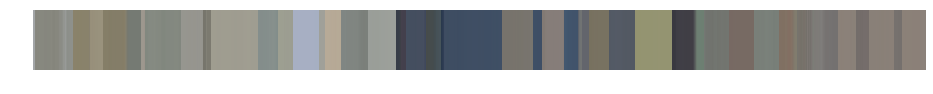

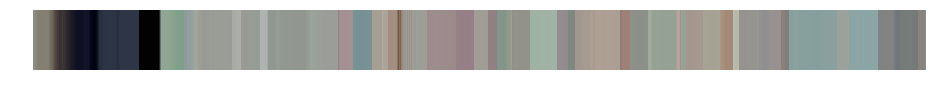

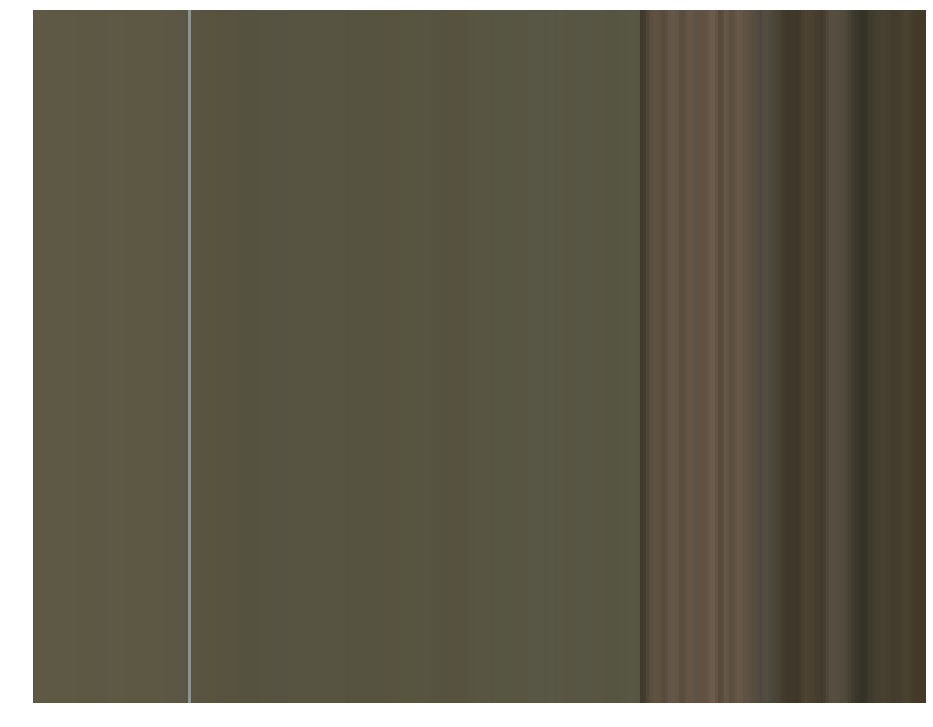

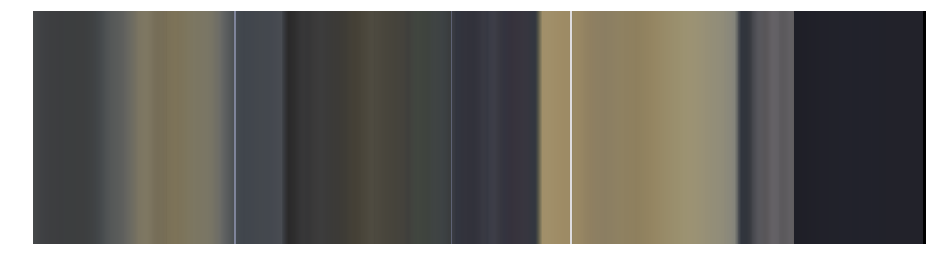

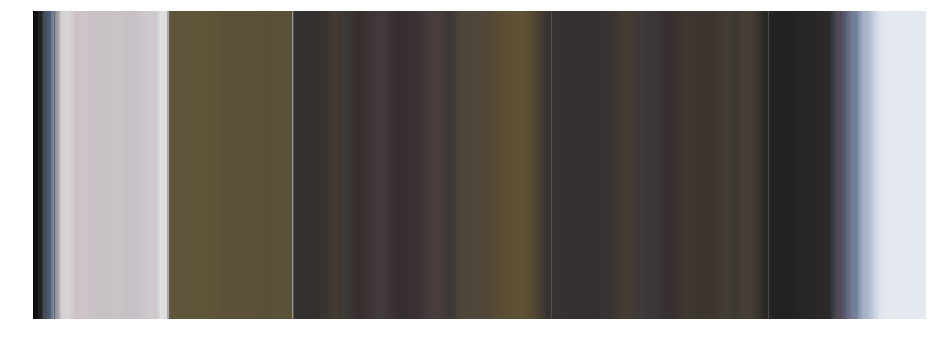

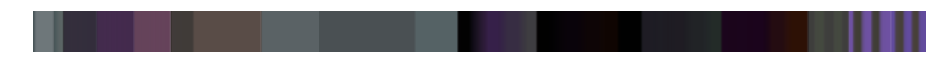

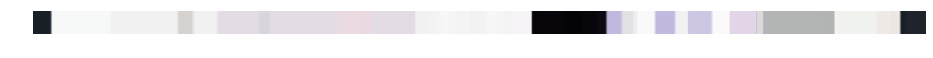

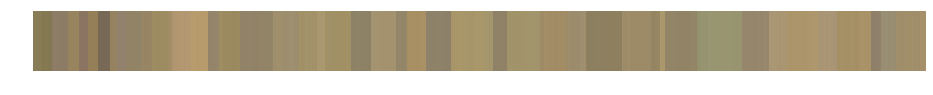

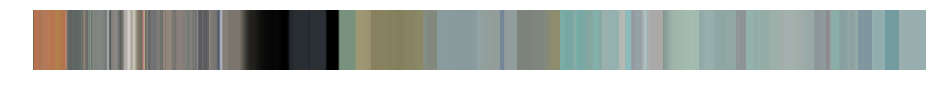

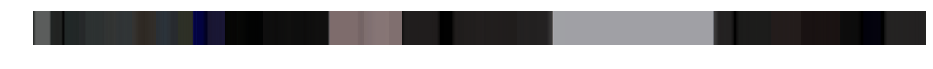

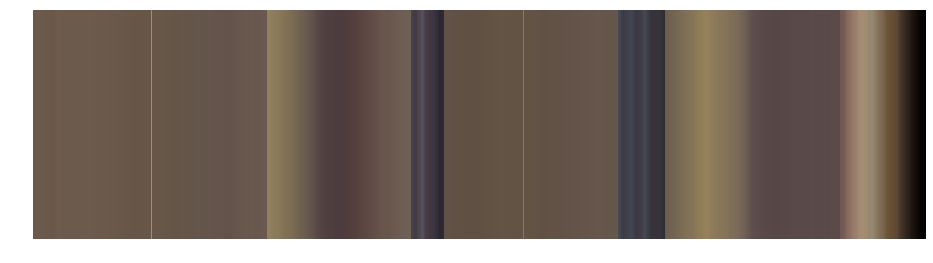

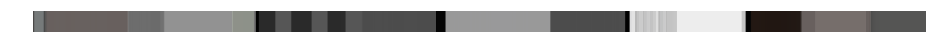

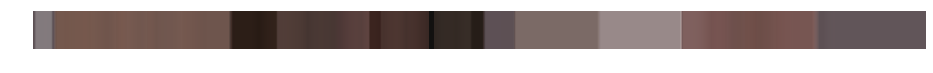

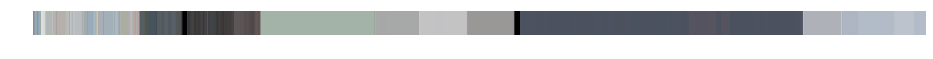

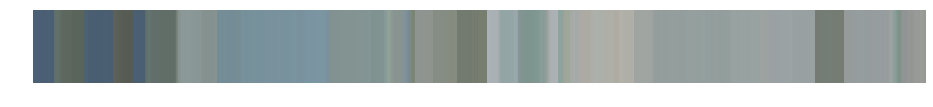

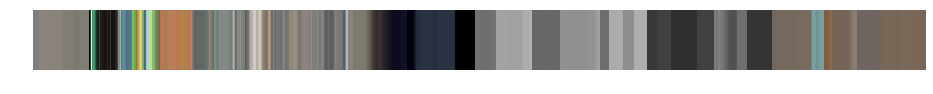

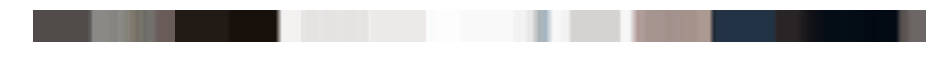

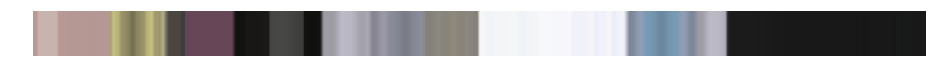

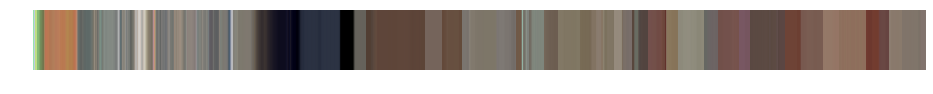

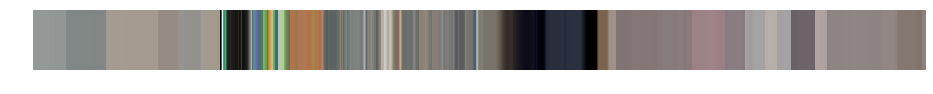

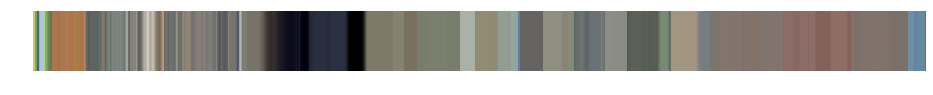

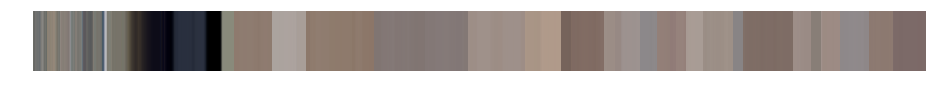

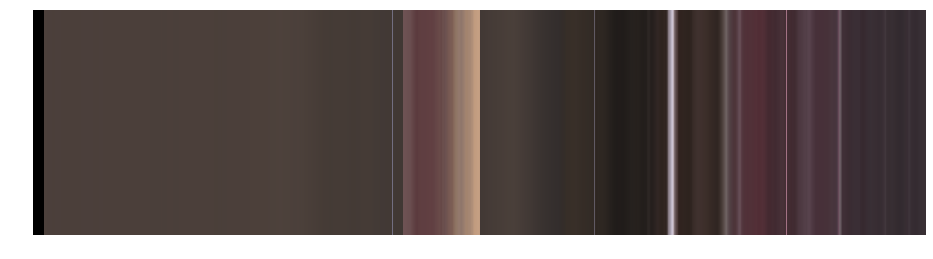

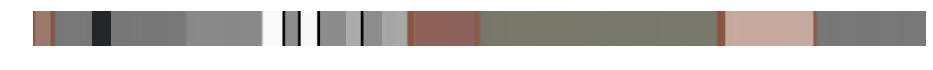

**************13**************


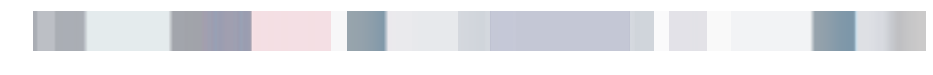

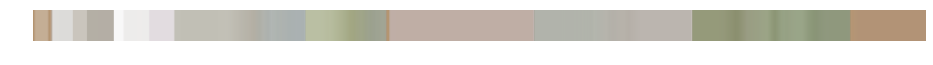

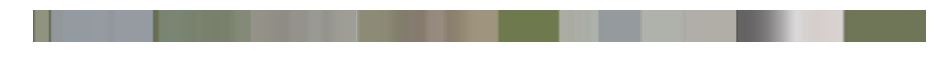

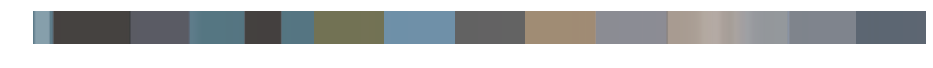

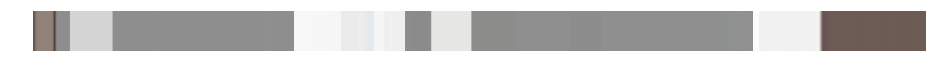

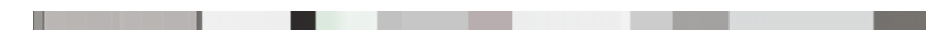

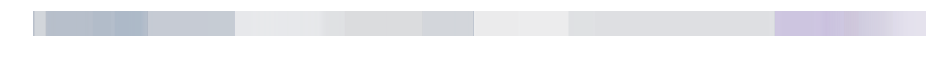

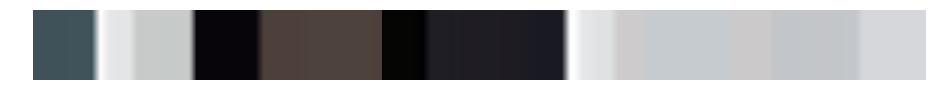

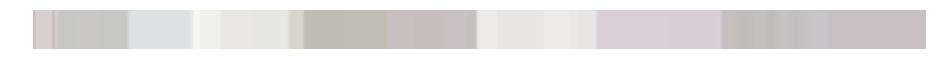

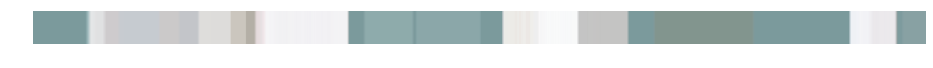

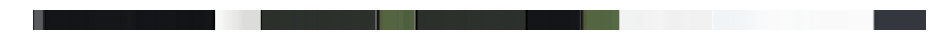

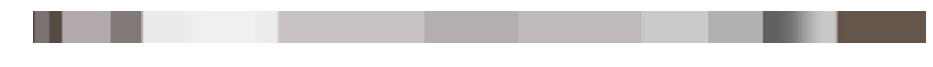

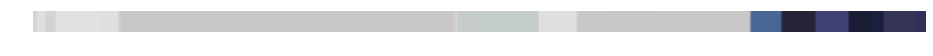

In [69]:
for cluster in clusters.keys():
    print("**************{}**************".format(cluster))
    for img in clusters[cluster][0]:
        image = Image.open(img)
        plt.imshow(image)
        plt.axis('off')
        plt.show()